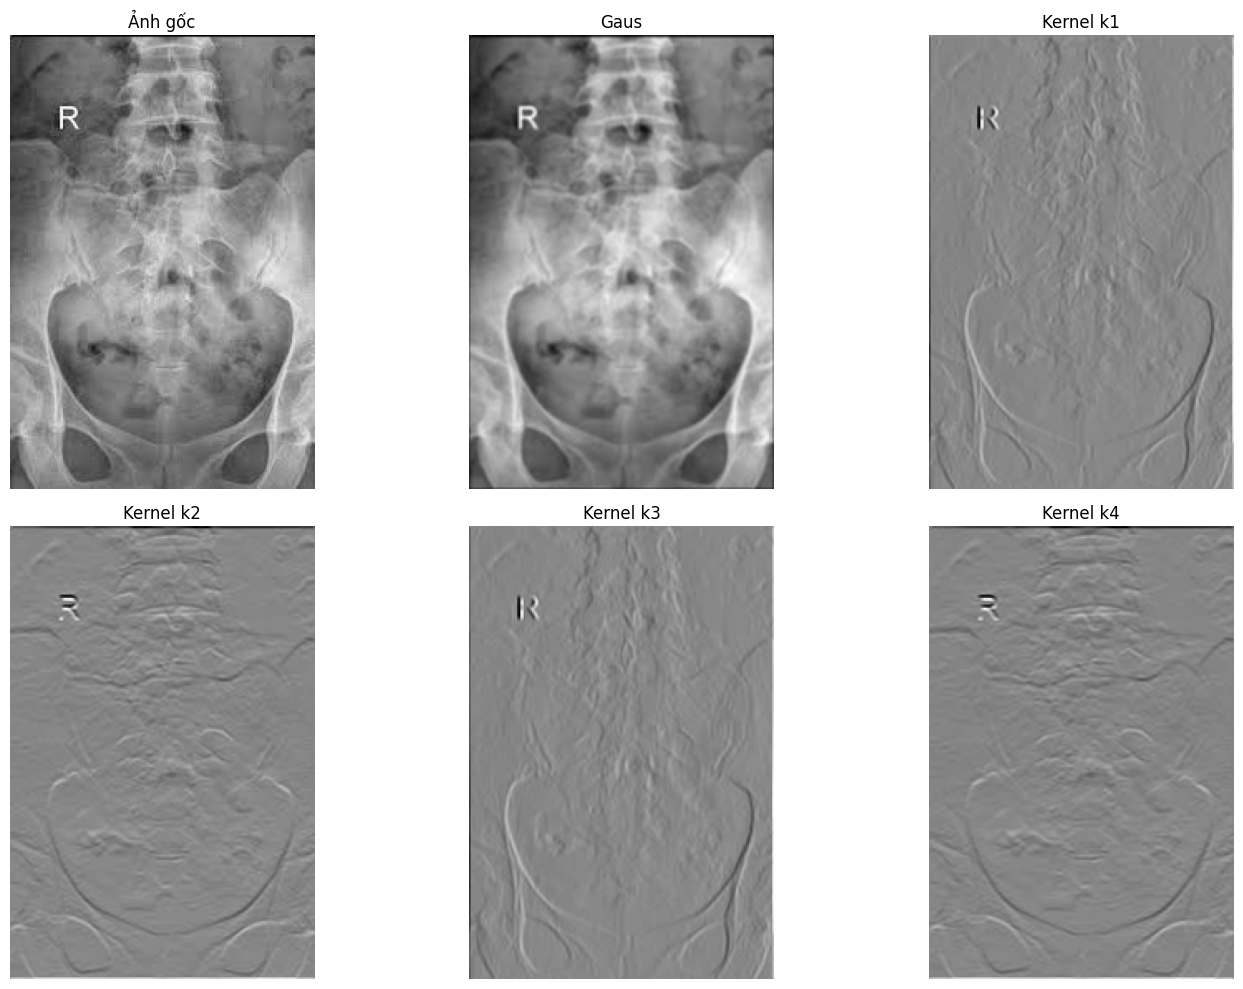

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def correlation(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    out = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i + kh, j:j + kw]
            out[i, j] = np.sum(region * kernel)
    return out

def convolution(img, kernel):
    kernel_flipped = np.flipud(np.fliplr(kernel))  #lat kernel 180 do
    return correlation(img, kernel_flipped)

# cac kernel
k_gaus = (1/16)*np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])
k1 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
k2 = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])
k3 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])
k4 = np.array([[-1, -1, -1],
               [0, 0, 0],
               [1, 1, 1]])

# doc anh

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/xuong.jfif")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def channels(img_rgb, kernel):
    r, g, b = cv2.split(img_rgb)
    output_r = convolution(r, kernel)
    output_g = convolution(g, kernel)
    output_b = convolution(b, kernel)
    return output_r, output_g, output_b

def normalize_img(img):
    img_norm = img - img.min()
    if img_norm.max() != 0:
        img_norm = img_norm / img_norm.max() * 255
    return img_norm.astype(np.uint8)

def channels_normalized(img_rgb, kernel):
    r, g, b = channels(img_rgb, kernel)
    r = normalize_img(r)
    g = normalize_img(g)
    b = normalize_img(b)
    return cv2.merge([r, g, b])

# chuan hoa
conv_img = channels_normalized(img_rgb, k_gaus)
conv_img1 = channels_normalized(img_rgb, k1)
conv_img2 = channels_normalized(img_rgb, k2)
conv_img3 = channels_normalized(img_rgb, k3)
conv_img4 = channels_normalized(img_rgb, k4)

# hien anh
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Ảnh gốc")

plt.subplot(2, 3, 2)
plt.imshow(conv_img)
plt.axis('off')
plt.title("Gaus")

plt.subplot(2, 3, 3)
plt.imshow(conv_img1)
plt.axis('off')
plt.title("Kernel k1")

plt.subplot(2, 3, 4)
plt.imshow(conv_img2)
plt.axis('off')
plt.title("Kernel k2")

plt.subplot(2, 3, 5)
plt.imshow(conv_img3)
plt.axis('off')
plt.title("Kernel k3")

plt.subplot(2, 3, 6)
plt.imshow(conv_img4)
plt.axis('off')
plt.title("Kernel k4")

plt.tight_layout()
plt.show()

# nhan xet: co the cac kernel k1,2,3,4 dung de phat hien bien , canh cua vat the
#kernel 2,4 co tac dungj giong nhau va kernel 1,3 co tac dung giong nhau , neu danh gia thi kernel2,4 su dung hieu qua hown
#hoac co the phat hien chieu ngang chieu doc



In [ ]:
#ap dung bai : matran 5,5 voi kernel 3,3
i2=np.array([[1,0,2,3,4],
            [4,1,0,2,4],
            [3,4,1,0,4],
            [1,2,3,4,4],
            [1,0,5,2,4]])
i=np.array([[1,0,2,3],
            [4,1,0,2],
            [3,4,1,0],
            [1,2,3,4]])
k_v=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
k_1=np.ones((3,3))
ar=convolution(i,k_v)
ar2=correlation(i,k_v)

br=convolution(i2,k_1)
br2=correlation(i2,k_1)

print("convulution =",ar)
print("correletion=",ar2)

print("convulution =",br)
print("correletion=",br2)



#nhanj xet:ca hai 2 co vi tri doi xung , hai 2 dau ra se nguoc mau nhau
#matran one cho 2 anh giong nhau

convulution = [[  9.   6.   3.   4.]
 [  8.   9.  -1.  -7.]
 [ -5.   2.   9.   7.]
 [-10. -12.  -6.  -1.]]
correletion= [[-9. -6. -3. -4.]
 [-8. -9.  1.  7.]
 [ 5. -2. -9. -7.]
 [10. 12.  6.  1.]]
convulution = [[ 6.  8.  8. 15. 13.]
 [13. 16. 13. 20. 17.]
 [15. 19. 17. 22. 18.]
 [11. 20. 21. 27. 18.]
 [ 4. 12. 16. 22. 14.]]
correletion= [[ 6.  8.  8. 15. 13.]
 [13. 16. 13. 20. 17.]
 [15. 19. 17. 22. 18.]
 [11. 20. 21. 27. 18.]
 [ 4. 12. 16. 22. 14.]]


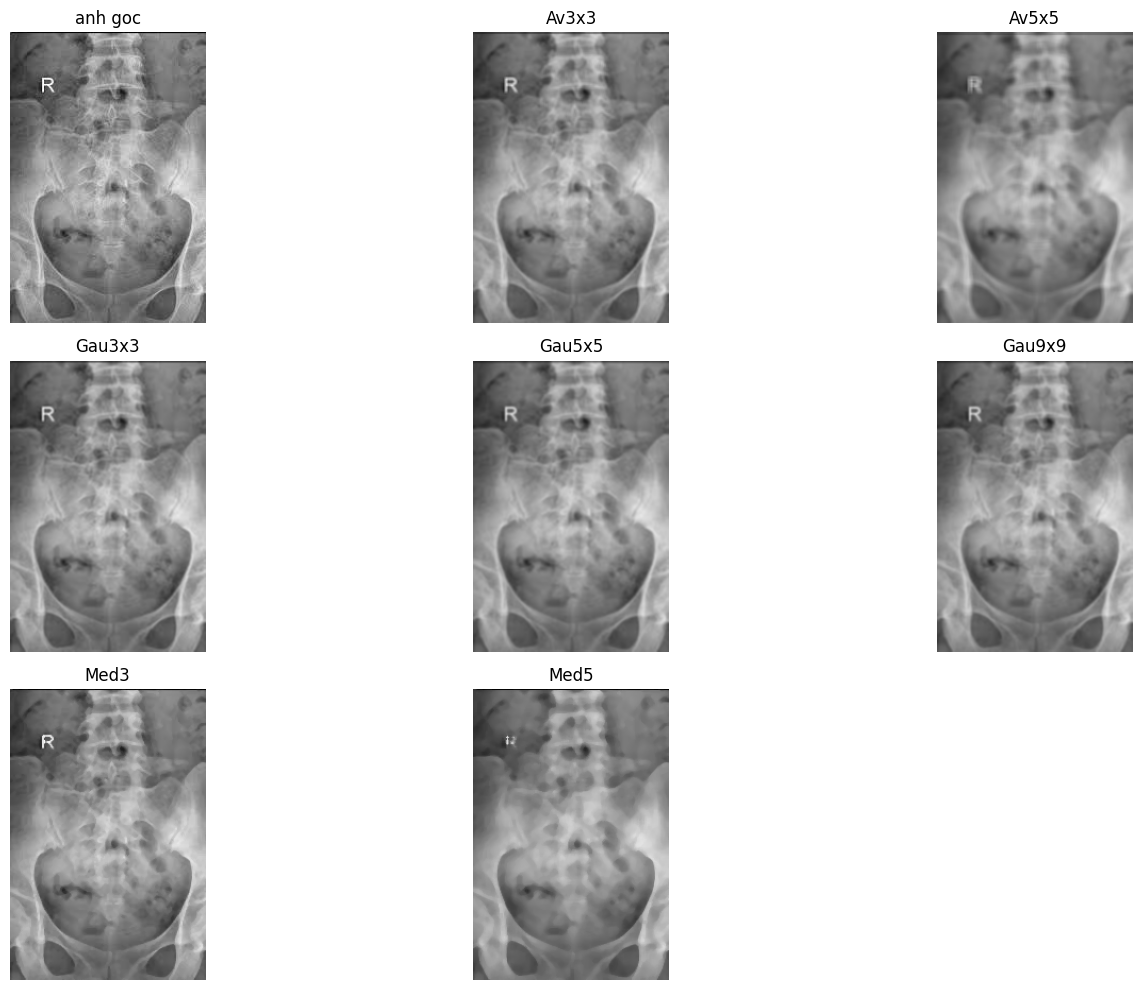

In [ ]:
img=cv2.imread("/content/xuong.jfif")
avg3=cv2.blur(img,(3,3))
avg5=cv2.blur(img,(5,5))

gau3=cv2.GaussianBlur(img,(3,3),sigmaX=1)
gau5=cv2.GaussianBlur(img,(5,5),sigmaX=1)
gau9=cv2.GaussianBlur(img,(9,9),sigmaX=1)

med3=cv2.medianBlur(img,3)
med5=cv2.medianBlur(img,5)

#chuan hoa anh
avg3 = cv2.cvtColor(avg3, cv2.COLOR_BGR2RGB)
avg5 = cv2.cvtColor(avg5, cv2.COLOR_BGR2RGB)
gau3 = cv2.cvtColor(gau3, cv2.COLOR_BGR2RGB)
gau5 = cv2.cvtColor(gau5, cv2.COLOR_BGR2RGB)
gau9 = cv2.cvtColor(gau9, cv2.COLOR_BGR2RGB)
med3 = cv2.cvtColor(med3, cv2.COLOR_BGR2RGB)
med5 = cv2.cvtColor(med5, cv2.COLOR_BGR2RGB)

# hien anh
plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
plt.imshow(img_rgb)
plt.title('anh goc')
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(avg3)
plt.title('Av3x3')
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(avg5)
plt.title('Av5x5')
plt.axis('off')

plt.subplot(3,3,4)
plt.imshow(gau3)
plt.title('Gau3x3')
plt.axis('off')

plt.subplot(3,3,5)
plt.imshow(gau5)
plt.title('Gau5x5')
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(gau9)
plt.title('Gau9x9')
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(med3)
plt.title('Med3')
plt.axis('off')

plt.subplot(3,3,8)
plt.imshow(med5)
plt.title('Med5')
plt.axis('off')

plt.tight_layout()
plt.show()
# trung binh blur: lay anh lan can lam mem anh , bi mo , gay mat chi tiet anh
#gau: dung torng so gaus, lm mo giu chi tiet on , khong qua nhoe nhu trung binh
# trung vi: co mat noise hieu qua hon 2 cai tren , canh bien vat the van sac net



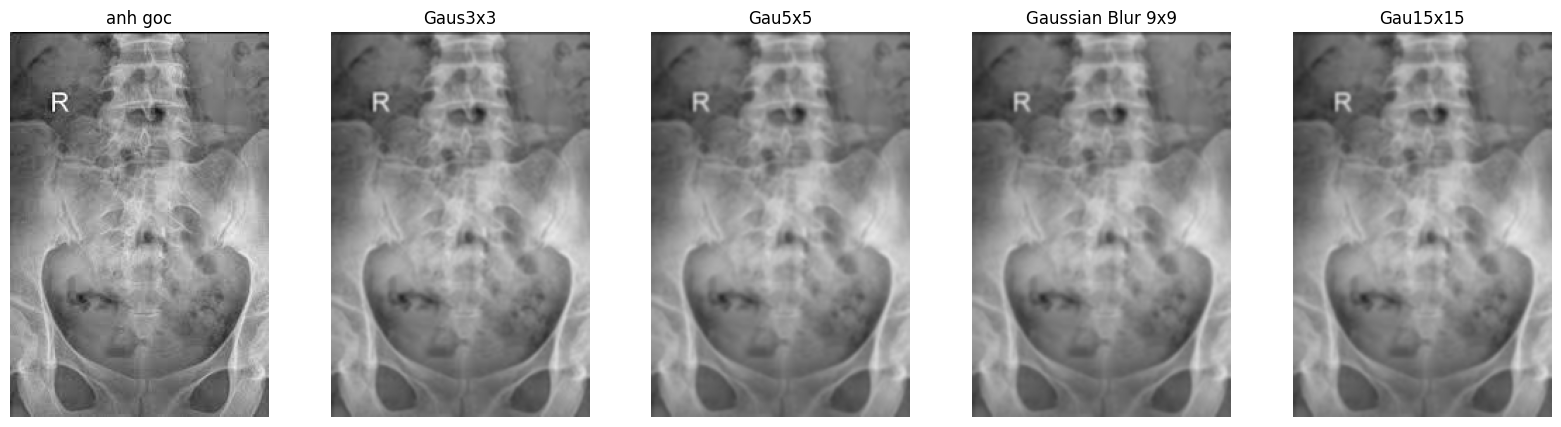

In [ ]:
blur_3 = cv2.GaussianBlur(img, (3, 3), sigmaX=1)
blur_3_rgb = cv2.cvtColor(blur_3, cv2.COLOR_BGR2RGB)

blur_5 = cv2.GaussianBlur(img, (5, 5), sigmaX=1)
blur_5_rgb = cv2.cvtColor(blur_5, cv2.COLOR_BGR2RGB)

blur_9 = cv2.GaussianBlur(img, (9, 9), sigmaX=1)
blur_9_rgb = cv2.cvtColor(blur_9, cv2.COLOR_BGR2RGB)

blur_15 = cv2.GaussianBlur(img, (15, 15), sigmaX=1)
blur_15_rgb = cv2.cvtColor(blur_15, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(img_rgb)
plt.title("anh goc")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(blur_3_rgb)
plt.title("Gaus3x3")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(blur_5_rgb)
plt.title("Gau5x5")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(blur_9_rgb)
plt.title("Gaussian Blur 9x9")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(blur_15_rgb)
plt.title("Gau15x15")
plt.axis('off')

plt.show()
#kich thuoc kernel gau cang lon , anh cang mat chi tiet vaf net nhieu hon



In [ ]:
mean=0
sigma=25
imgray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gau_noise=np.random.normal(mean,sigma,imgray.shape).astype(np.float32)

gau_noise_img=imgray.astype(np.float32)+gau_noise
gau_noise_img= np.clip(gau_noise_img,0,255).astype(np.uint8)

prob=0.2 #ti le nhieu
sp_noise_img=img.copy()

rnd=np.random.rand(*img.shape)

#muoi
sp_noise_img[rnd<(prob/2)]=0
sp_noise_img[rnd>1-(prob/2)]=255

denoise_gau_gblur = cv2.GaussianBlur(gau_noise_img, (5,5), sigmaX=1)

denoise_gau_median = cv2.medianBlur(gau_noise_img, 5)

denoise_sp_gblur = cv2.GaussianBlur(sp_noise_img, (5,5), sigmaX=1)

denoise_sp_median = cv2.medianBlur(sp_noise_img, 5)


plt.figure(figsize=(16, 12))


plt.subplot(3, 3, 1)
plt.imshow(imgray, cmap='gray')
plt.title("anh goc")
plt.axis('off')

# Gaussian Noise
plt.subplot(3, 3, 2)
plt.imshow(gau_noise_img, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

# khu muoi va tieu
plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(sp_noise_img, cv2.COLOR_BGR2RGB))
plt.title("muoi tieu")
plt.axis('off')

# khu gausi
plt.subplot(3, 3, 5)
plt.imshow(denoise_gau_gblur, cmap='gray')
plt.title("Gaus noisr")
plt.axis('off')

# khu median
plt.subplot(3, 3, 6)
plt.imshow(denoise_gau_median, cmap='gray')
plt.title("Gmedianr")
plt.axis('off')


plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(denoise_sp_gblur, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Khử S&P Noise - Median Filter
plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(denoise_sp_median, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


Bài 4 – Làm mịn và làm sắc nét ảnh (Smoothing & Sharpening)
Mục tiêu
  Hiểu sự khác biệt giữa bộ lọc làm mịn (smoothing) và làm sắc nét (sharpening).
  Thực hành áp dụng Gaussian Blur, Average Blur để giảm nhiễu.
  Tạo bộ lọc sharpening bằng công thức Unsharp Masking.
  Quan sát ảnh trước/sau để thấy rõ tác động.
1.  Thực hiện smoothing:
  Gaussian Blur với kernel 3×3, 5×5.
  Average Blur với kernel 3×3, 5×5.
2.  Tạo bộ lọc sharpening bằng công thức Unsharp Masking:
3.  Thử với nhiều giá trị  𝛼 (ví dụ: 0.5, 1.0, 2.0).
4.  So sánh ảnh trước và sau xử lý

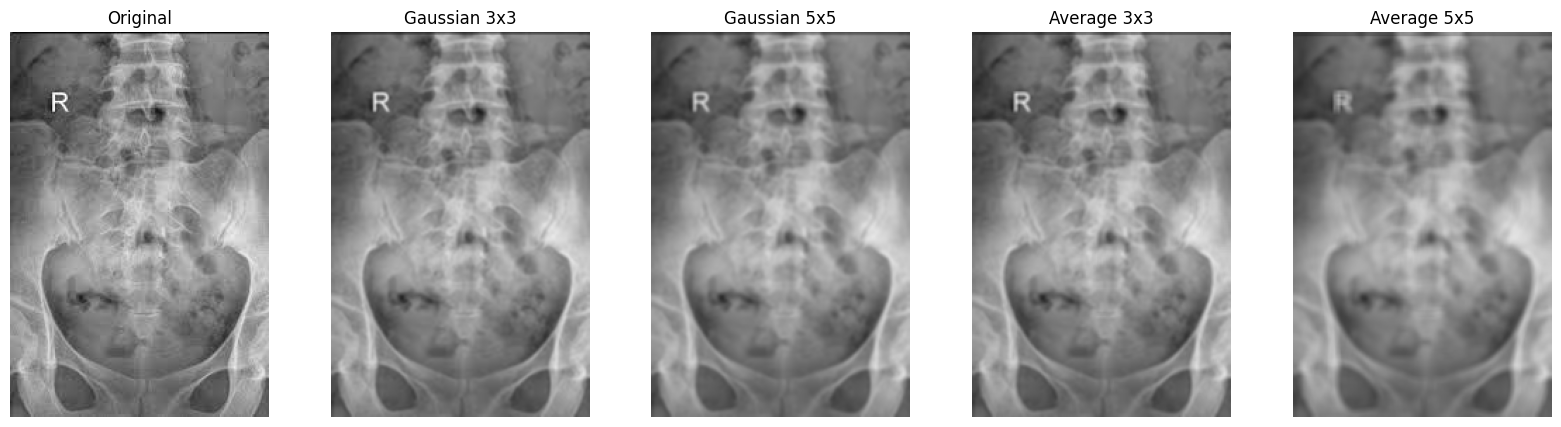

In [2]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/xuong.jfif")


gaussian_3x3 = cv2.GaussianBlur(img, (3, 3), 0)
gaussian_5x5 = cv2.GaussianBlur(img, (5, 5), 0)


average_3x3 = cv2.blur(img, (3, 3))
average_5x5 = cv2.blur(img, (5, 5))

titles = ['Original', 'Gaussian 3x3', 'Gaussian 5x5', 'Average 3x3', 'Average 5x5']
images = [img, gaussian_3x3, gaussian_5x5, average_3x3, average_5x5]

plt.figure(figsize=(20, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()


def unshape(img, a):
    img_float = img.astype(np.float32)
    blurred = cv2.GaussianBlur(img_float, (5,5), 0)
    unsharp = img_float + a * (img_float - blurred)
    unsharp = np.clip(unsharp, 0, 255)
    return unsharp.astype(np.uint8)

a_values = [0.5, 1, 2]
titles_u = ['unshape=0.5', 'unshape=1', 'unshape=2']

plt.figure(figsize=(15, 5))
for i, a_val in enumerate(a_values):
    img_unshape = unshape(img, a_val)
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(img_unshape, cv2.COLOR_BGR2RGB))
    plt.title(titles_u[i])
    plt.axis('off')
plt.show()


sa sanhs :

smoothing: cho phep lam mo bien de voi 2 ham averg va gausian blur , anh sau khi ung dung bi mo

unshape: lam ro anh bang he so a , anh goc tru cho anh bi mo se ra anh sac net , he so cang lon anh cang ro net

bai 6: laplacian
Ảnh hưởng của Padding trong Convolution
Mục tiêu
  Hiểu rõ vai trò của padding khi áp dụng convolution.
  Quan sát ảnh hưởng của các chế độ padding khác nhau lên kết quả lọc ảnh
1.  Cài đặt các chế độ padding:
2.  Áp dụng cùng một kernel Laplacian:
3.  So sánh kết quả thu được
4.  Nhận xét ảnh hưởng của padding đến biên ảnh?

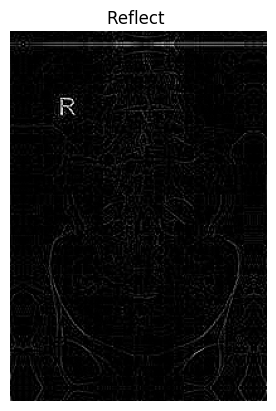

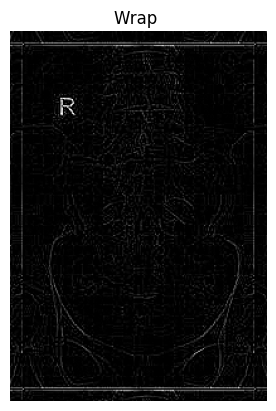

In [6]:
#tao bien
pad_size=10
#zero pad , bien =0 , vien den
padding_zero = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode='constant', constant_values=0)

# vien trong , lay trong ra ngoai
padding_replicate = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode='edge')

# vien o hang ngoai , dulicate cho no thanh bine
padding_reflect = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode='reflect')

# wrap ca 4 canh anh
padding_wrap = np.pad(img, ((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode='wrap')

laplacian= np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]])
lap_zero = cv2.filter2D(padding_zero, -1, laplacian)
lap_replicate = cv2.filter2D(padding_replicate, -1, laplacian)
lap_reflect = cv2.filter2D(padding_reflect, -1, laplacian)
lap_wrap = cv2.filter2D(padding_wrap, -1, laplacian)
def show_img(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_img('Zero ', lap_zero)
show_img('Replicate ', lap_replicate)
show_img('Reflect ', lap_reflect)
show_img('Wrap ', lap_wrap)


Zero padding dễ gây và viền đen ở biên.

Replicate  và Reflect giữ sự liên tục vùng biên tốt hơn .

Wrap padding ít dùng với ảnh tự nhiên, hợp với ảnh tuj nhien.

bai7:

Hiểu cách phát hiện biên ảnh bằng convolution với các kernel Sobel, Prewitt.

  So sánh kết quả với thuật toán Canny trong OpenCV.

  Rút ra ưu/nhược điểm của từng phương pháp.

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_x_convo=convolution(gray,sobel_x)


sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])
sobel_y_convo=convolution(gray,sobel_y)

# Prewitt
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

prewitt_x_convo=convolution(gray,prewitt_x)
prewitt_y_convo=convolution(gray,prewitt_y)

# Canny

canny_img = cv2.Canny(gray, 100, 200)

# Áp dụng filter2D để tính gradient theo x và y

sobel_img = cv2.magnitude(sobel_x_convo.astype(np.float32), sobel_y_convo.astype(np.float32))
prewitt_img = cv2.magnitude(prewitt_x_convo.astype(np.float32), prewitt_y_convo.astype(np.float32))



plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
plt.imshow(sobel_x_convo, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(sobel_y_convo, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(sobel_img)
plt.title("Sobel Magnitude")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(prewitt_x_convo, cmap='gray')
plt.title("Prewitt X")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(prewitt_y_convo, cmap='gray')
plt.title("Prewitt Y")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(prewitt_img)
plt.title("Prewitt Magnitude")
plt.axis('off')

plt.subplot(3,3,7)
plt.imshow(canny_img, cmap='gray')
plt.title("Canny")
plt.axis('off')

plt.show()


Sobel / Prewitt

Phát hiện biên bằng cách tính đạo hàm (Sobel = có trọng số, Prewitt = đơn giản hơn).

Kết quả: biên thường dày,dễ bị ảnh hưởng bởi nhiễu.

Prewitt nhạy với nhiễu hơn Sobel, vì không có hệ số làm mượt như Sobel.
Canny

canny


Double threshold + hysteresis → loại bỏ nhiễu, chỉ giữ biên thực sự.

**Tại sao Canny thường cho biên “mảnh” và ít nhiễu hơn Sobel?**

giảm nhiễu đầu vào.

loại bỏ biên yếu (nhiễu), chỉ giữ biên mạnh và liên tục

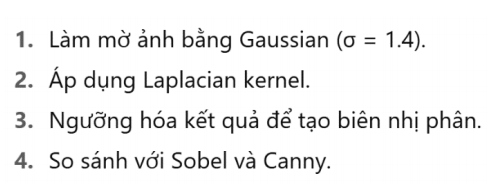
bai 8:


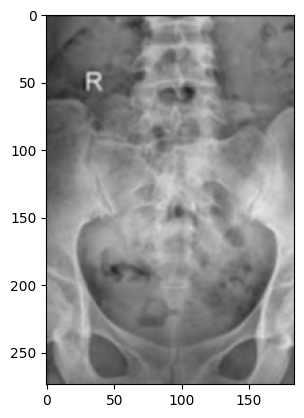

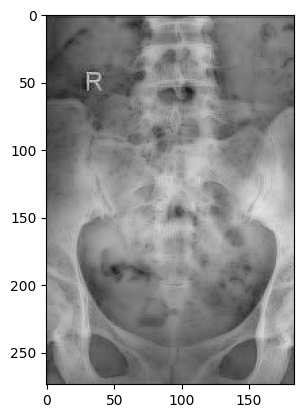

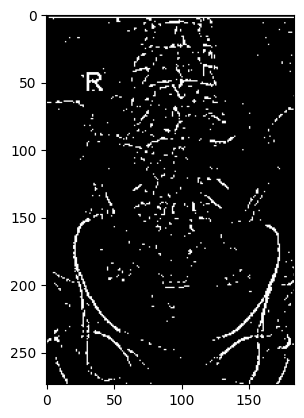

In [18]:
gaussian = cv2.GaussianBlur(img, (3, 3),1.4)
#anh voi sigma=1.4 rat mo
plt.imshow(gaussian)
plt.show()
#ap dung anh gau cho kernel laplacian
gaussian2=cv2.filter2D(gaussian, 0, laplacian)
plt.imshow(img-gaussian2)
plt.show()
gray_image = cv2.cvtColor(gaussian2, cv2.COLOR_BGR2GRAY)

_, binary_img = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)
# binary_img


plt.imshow(binary_img, cmap='gray')
plt.show()

bai 9:
Phát hiện biên bản số xe

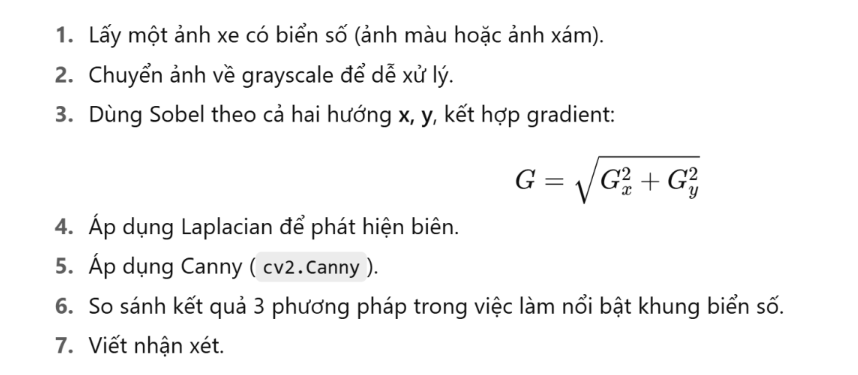

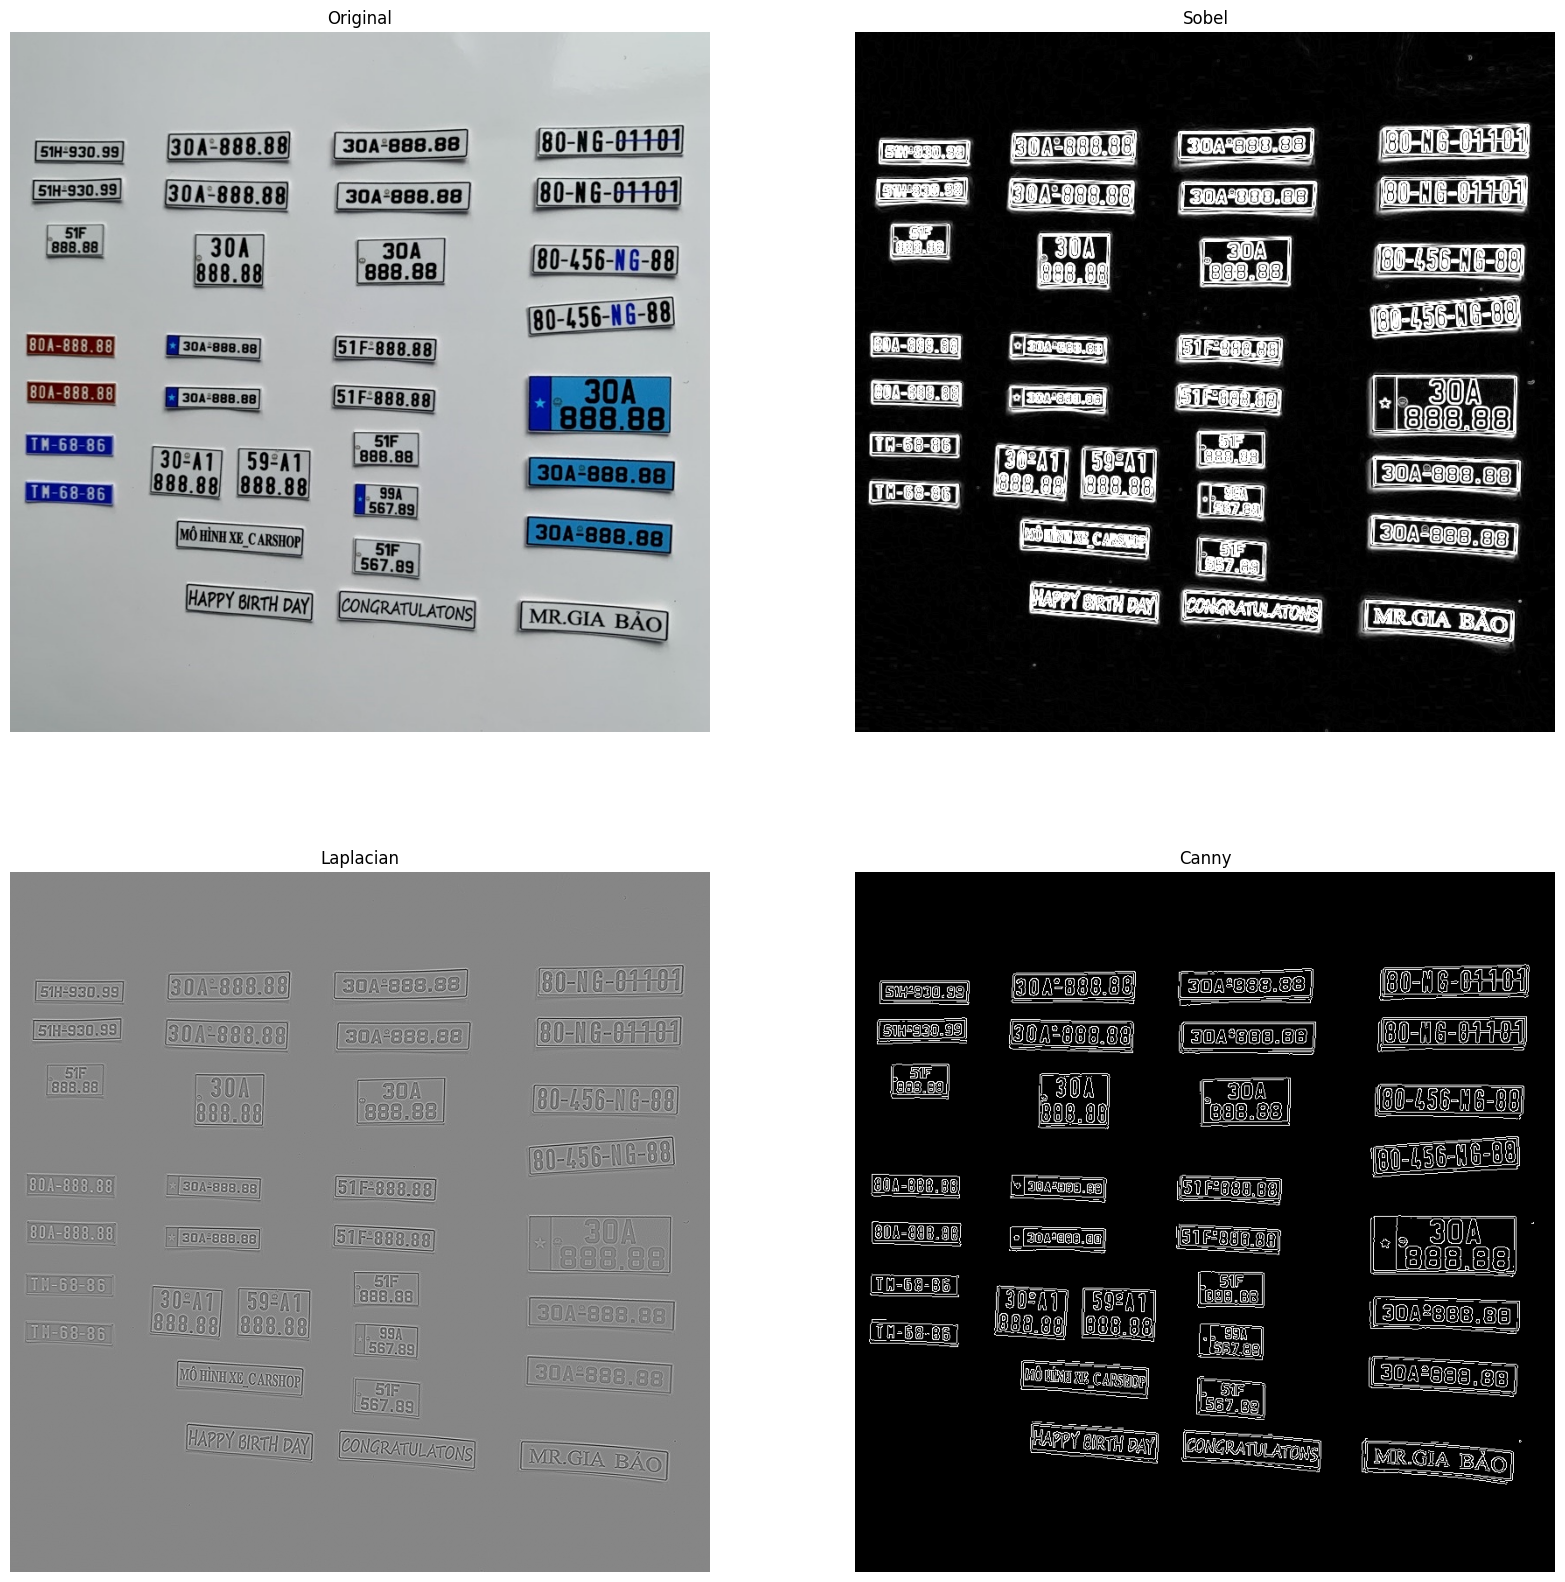

In [35]:
bienso=cv2.imread("/content/drive/MyDrive/Colab Notebooks/bienso.jpg")

bienso_gray=cv2.cvtColor(bienso,cv2.COLOR_BGR2GRAY)

sobel_x_bien=cv2.filter2D(bienso_gray,cv2.CV_64F,sobel_x)
sobel_y_bien=cv2.filter2D(bienso_gray,cv2.CV_64F,sobel_y)
sobel_bienso=cv2.magnitude(sobel_x_bien.astype(np.float32), sobel_y_bien.astype(np.float32))
sobel_bienso = np.uint8(np.clip(sobel_bienso, 0, 255))

#ap dung laplacian
lap_bienso=cv2.filter2D(bienso_gray,cv2.CV_32F,laplacian)

#ap dung canny
canny_bienso= cv2.Canny(bienso_gray,100,200)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(bienso,cmap = 'gray')
plt.title('Original')
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(sobel_bienso,cmap = 'gray')
plt.title('Sobel')
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(lap_bienso,cmap = 'gray')
plt.title('Laplacian')
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(canny_bienso,cmap = 'gray')
plt.title('Canny')
plt.axis("off")
plt.show()





Sobel:

Ưu điểm:

Có thể chọn hướng biên (ngang, dọc).

Nhược điểm:

Chỉ dựa vào gradient nên cho kết quả biên dày và thô

Không loại bỏ nhiễu tốt nếu ảnh gốc bị noise

Laplacian:

Ưu điểm:

Bắt được biên theo mọi hướng (không cần tách riêng x, y).

Nhấn mạnh vùng có thay đổi mạnh (ví dụ: đường viền).

Nhược điểm:

Rất nhạy với nhiễu, vì đạo hàm bậc 2 khuếch đại noise.

canny:

Ưu điểm:

Cho kết quả biên mảnh, rõ ràng, liên tục.

Khả năng loại bỏ nhiễu tốt nhờ Gaussian

Nhược điểm:

Tính toán nặng hơn Sobel, Laplacian.

Cần tinh chỉnh ngưỡng threshold1, threshold2.

bai 10:
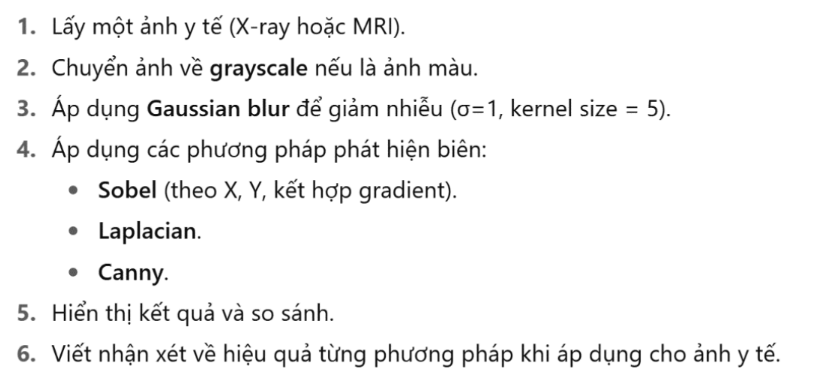

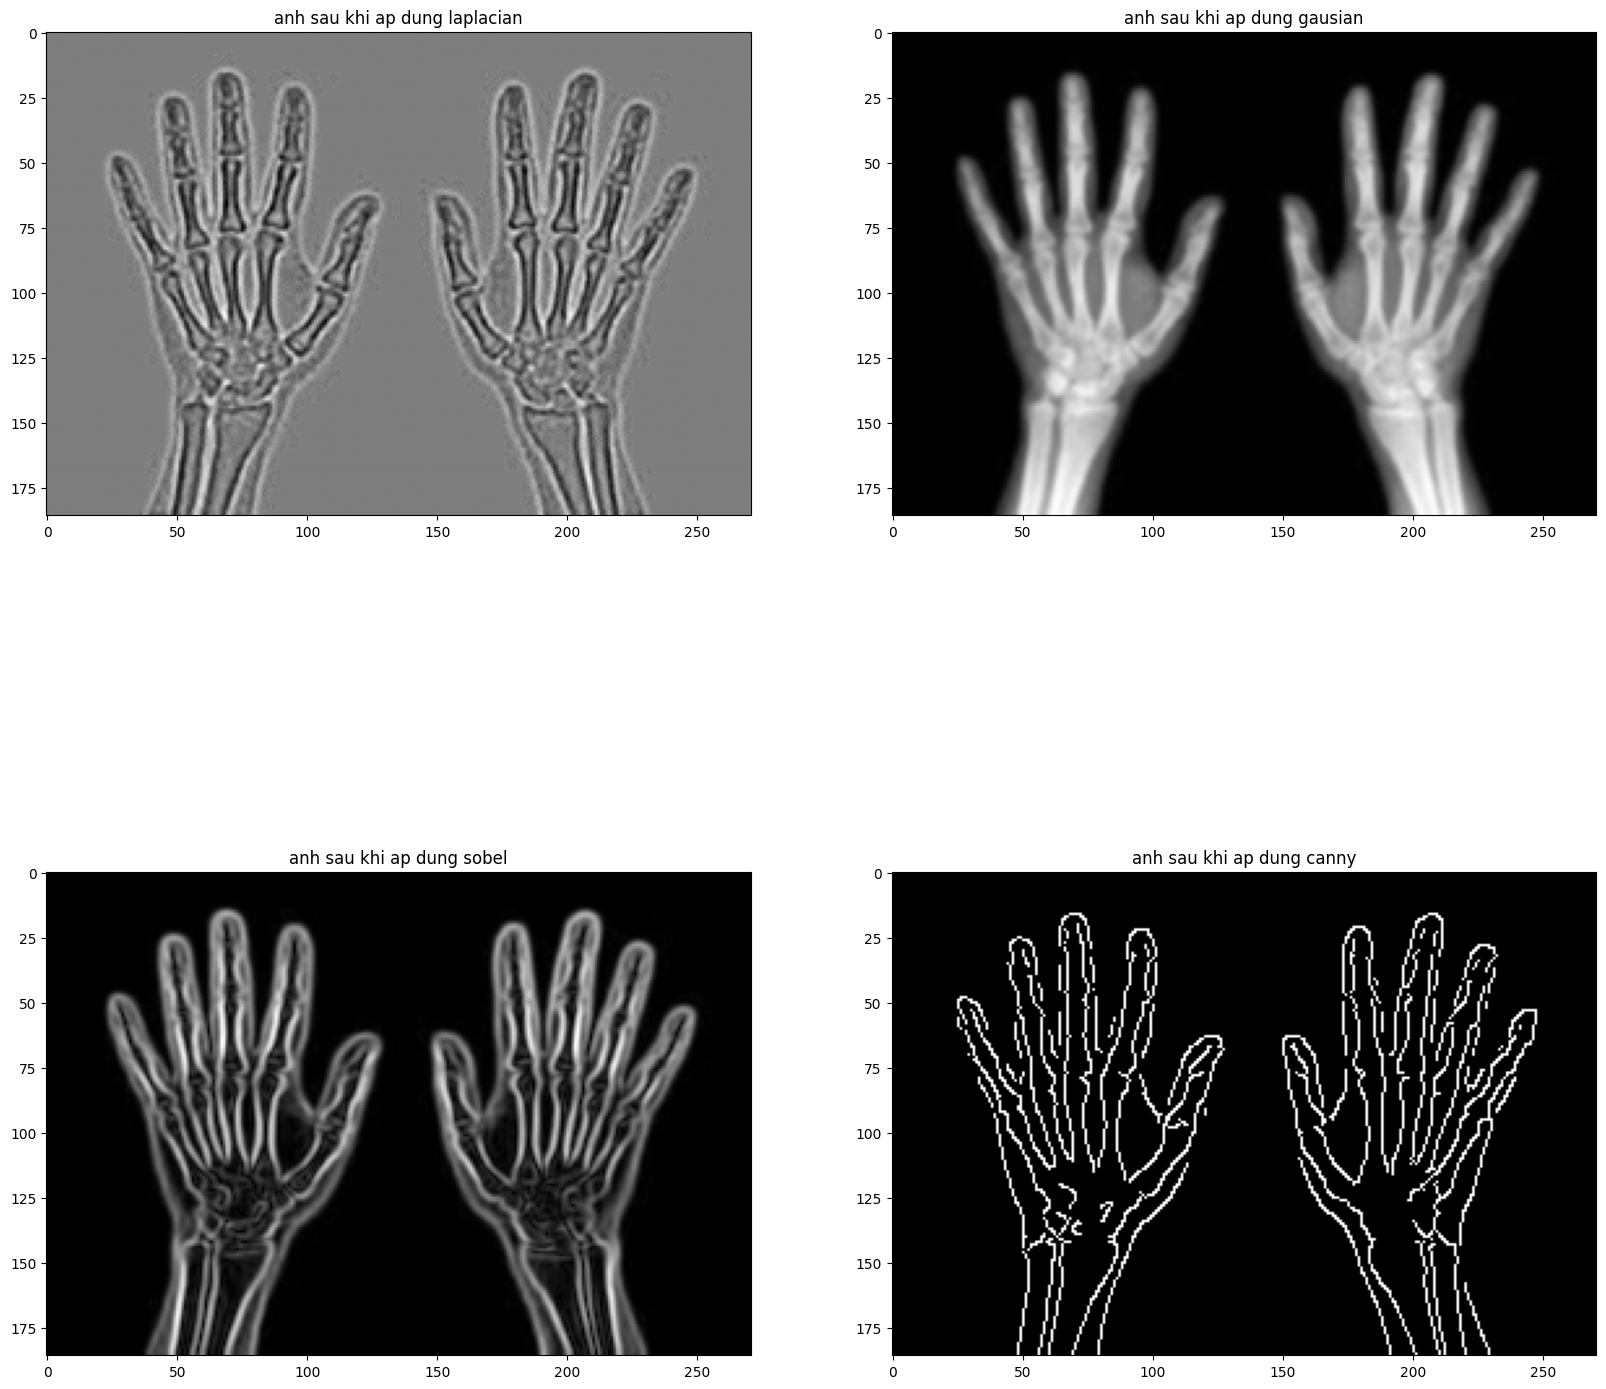

In [38]:
tay=cv2.imread("/content/drive/MyDrive/Colab Notebooks/xuongtay.jpg")

tay_gray=cv2.cvtColor(tay,cv2.COLOR_BGR2GRAY)
#ap dung gausian de giam nhieu
gau_tay=cv2.GaussianBlur(tay_gray,(5,5),1)
#ap dung cac bo loc

sobel_x = cv2.Sobel(gau_tay, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gau_tay, cv2.CV_64F, 0, 1, ksize=3)

# madnitude
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

lap_tay=cv2.Laplacian(gau_tay,cv2.CV_64F)

canny_tay=cv2.Canny(gau_tay,100,200)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(lap_tay,cmap="gray")
plt.title("anh sau khi ap dung laplacian")


plt.subplot(2,2,2)
plt.imshow(gau_tay,cmap="gray")
plt.title("anh sau khi ap dung gausian")

plt.subplot(2,2,3)
plt.imshow(sobel_mag,cmap="gray")
plt.title("anh sau khi ap dung sobel")

plt.subplot(2,2,4)
plt.imshow(canny_tay,cmap="gray")
plt.title("anh sau khi ap dung canny")
plt.show()


Gaus

Giúp giảm nhiễu ban đầu.

Cần thiết cho ảnh y tế vì X-quang thường bị nhiễu hạt (grainy).

Nhưng Gaussian không dùng để phát hiện biên, chỉ là bước tiền xử lý.

Sobel

Kết quả tốt cho những đường biên lớn (xương, khớp).

Tuy nhiên, Sobel dễ bị nhiễu, và biên có thể dày

Laplacian

Dùng đạo hàm bậc hai → nhạy với thay đổi cường độ sáng.

Phát hiện biên mạnh,nhạy với nhiễu.

Canny

Kết quả: biên mảnh, rõ, ít nhiễu hơn Sobel & Laplacian.

tóm lại: Canny được xem như tốt nhất trong tất cả các bộ lọc

baia 11:

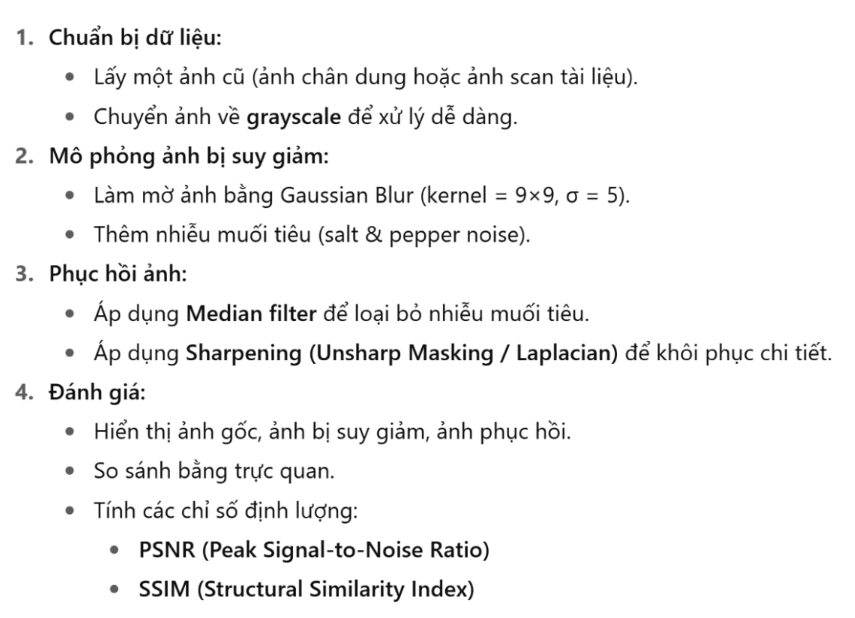

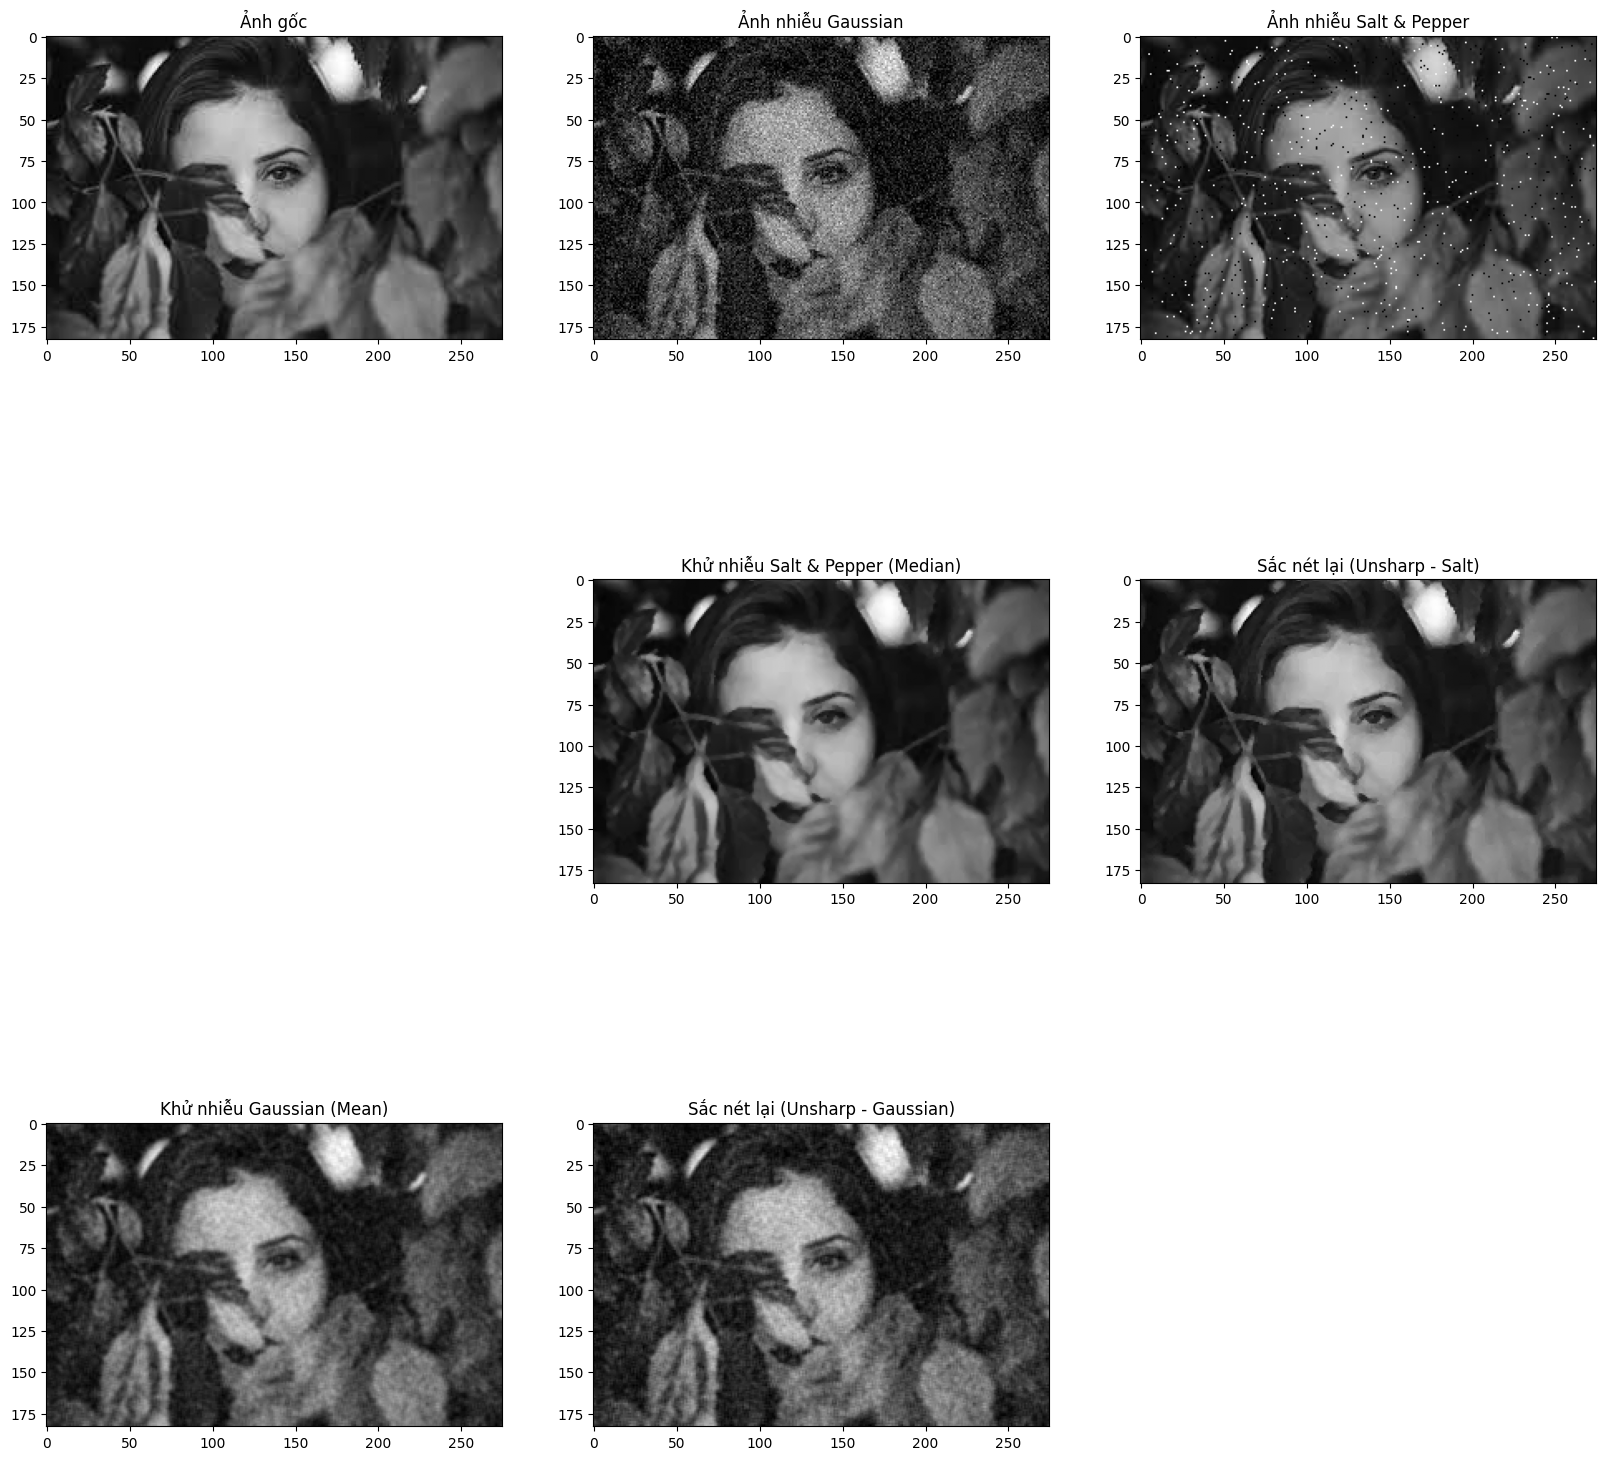

In [54]:
lady=cv2.imread("/content/drive/MyDrive/Colab Notebooks/phunu.jpg")

lady_gray=cv2.cvtColor(lady,cv2.COLOR_BGR2GRAY)

#cai dat ham salt papper

def salt_pepper_noise(image, prob=0.02):
    output = np.copy(image)
    rnd = np.random.rand(*image.shape)
    output[rnd < (prob / 2)] = 0
    output[rnd > 1 - (prob / 2)] = 255
    return output

# Hàm tạo Gaussian noise
def gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Tạo ảnh nhiễu
salt_lady = salt_pepper_noise(lady_gray, prob=0.02)
gau_lady = gaussian_noise(lady_gray, sigma=25)

# Khử nhiễu
median_lady_salt = cv2.medianBlur(salt_lady, 3)   # phục hồi salt-pepper
mean_lady_gau = cv2.blur(gau_lady, (3,3))         # phục hồi gaussian

# Unsharp masking (làm sắc nét lại)
sharp_lady_salt = cv2.addWeighted(median_lady_salt, 1.5, cv2.blur(median_lady_salt, (3,3)), -0.5, 0)
sharp_lady_gau = cv2.addWeighted(mean_lady_gau, 1.5, cv2.blur(mean_lady_gau, (3,3)), -0.5, 0)

# Hiển thị kết quả
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.title("Ảnh gốc")
plt.imshow(lady_gray, cmap='gray')

plt.subplot(3,3,2)
plt.title("Ảnh nhiễu Gaussian")
plt.imshow(gau_lady, cmap='gray')

plt.subplot(3,3,3)
plt.title("Ảnh nhiễu Salt & Pepper")
plt.imshow(salt_lady, cmap='gray')

plt.subplot(3,3,5)
plt.title("Khử nhiễu Salt & Pepper (Median)")
plt.imshow(median_lady_salt, cmap='gray')

plt.subplot(3,3,6)
plt.title("Sắc nét lại Salt)")
plt.imshow(sharp_lady_salt, cmap='gray')

plt.subplot(3,3,7)
plt.title("Khử nhiễu Gaussian (Mean)")
plt.imshow(mean_lady_gau, cmap='gray')

plt.subplot(3,3,8)
plt.title("Sắc nét lại")
plt.imshow(sharp_lady_gau, cmap='gray')

plt.show()




